<a href="https://colab.research.google.com/github/marcellosicbaldi/EEG-processing/blob/main/EEG_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic signal processing in Python

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import output
output.enable_custom_widget_manager()

<StemContainer object of 3 artists>

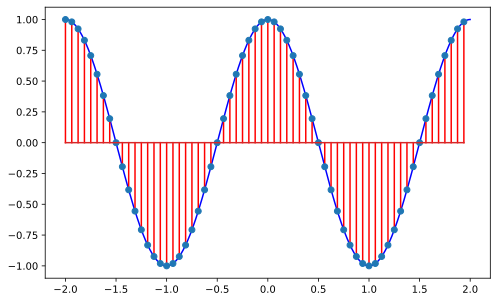

In [ ]:
# Approximated analog signal
fsa = 1000
ta = np.arange(-2, 2, 1/fsa)
xa = np.cos(pi*ta)

# Discrete signal
fs = 16
t = np.arange(-2, 2, 1/fs)
x = np.cos(pi*t)

# plot
#%matplotlib widget
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(ta,xa, 'b')
ax.stem(t,x, 'r')

(0.0, 35.0)

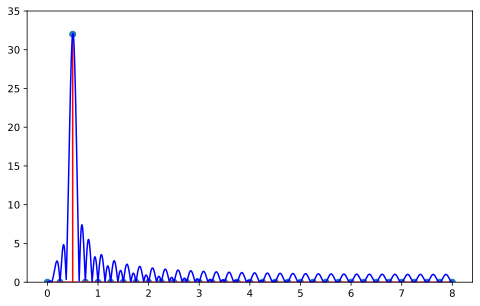

In [ ]:
# DFT
n = len(x)
f = np.fft.rfftfreq(n, 1/fs)
DFT = np.fft.rfft(x)
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(f, np.abs(DFT.real), 'r')

# Approximated DTFT
M = 4000
f = np.fft.rfftfreq(M, 1/fs)
DTFT = np.fft.rfft(x, M)
ax.plot(f, np.abs(DTFT.real), 'b')
plt.ylim((0,35))

In [ ]:
# New signal: sum of sinusoidal components

# Approximated analog
fsa = 50
ta = np.arange(-2,2,1/fsa)
x1a = 3*np.cos(4*pi*ta)
x2a = 1.5*np.cos(5*pi*ta)
x3a = 4*np.cos(3*pi*ta)
x4a = 2*np.cos(9*pi*ta)
x5a = np.cos(pi*ta)

xa = x1a+x2a+x3a+x4a+x5a

# Digital
fs = 16
t = np.arange(-2,2,1/fs)
x1 = 3*np.cos(4*pi*t)
x2 = 1.5*np.cos(5*pi*t)
x3 = 4*np.cos(3*pi*t)
x4 = 2*np.cos(9*pi*t)
x5 = np.cos(pi*t)

x = x1+x2+x3+x4+x5

Maximum frequency in the signal: 4.5 Hz!  -->  The sampling frequency must be at least 9 Hz

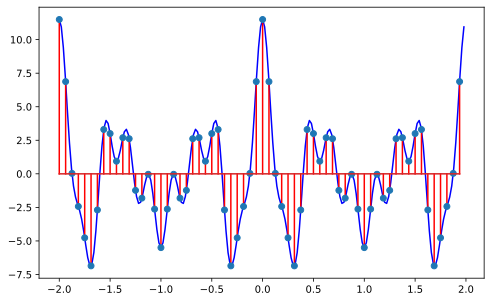

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(ta,xa,'b');
ax.stem(t,x,'r');

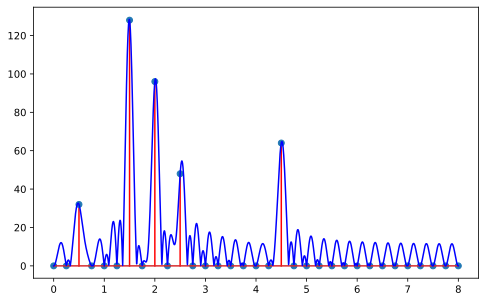

In [ ]:
# DFT
n = len(x)
f = np.fft.rfftfreq(n, 1/fs)
DFT = np.fft.rfft(x)
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(f, np.abs(DFT.real), 'r')

%config InlineBackend.figure_format = 'svg'
# Approximated DTFT
M = 4000
f = np.fft.rfftfreq(M, 1/fs)
DTFT = np.fft.rfft(x, M)
ax.plot(f, np.abs(DTFT.real), 'b');

Let's now try some filtering: IIR ELLPTIC FILTER

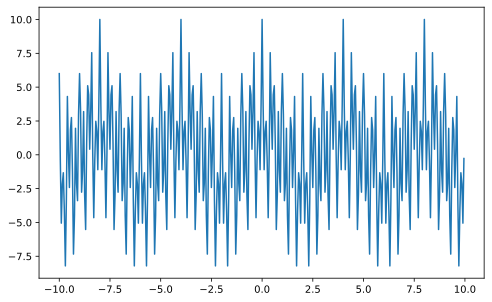

In [ ]:
fs = 20
t = np.arange(-10,10,1/fs)
x1 = 3*np.cos(4*pi*t)
#x2 = 1.5*np.cos(20*pi*t)
x3 = 4*np.cos(10*pi*t)
x4 = 2*np.cos(0.5*pi*t) 
x5 = np.cos(15*pi*t) # max frequency: 7.5 --> fs must be at least 15 Hz

x = x1+x3+x4+x5

fig, ax1 = plt.subplots(figsize = (8,5))
ax1.plot(t,x);

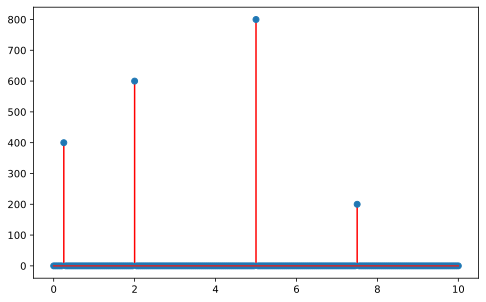

In [ ]:
# DFT
n = len(x)
f = np.fft.rfftfreq(n, 1/fs)
DFT = np.fft.rfft(x)
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(f, np.abs(DFT.real), 'r');

# Approximated DTFT
# M = 4000
# f = np.fft.rfftfreq(M, 1/fs)
# DTFT = np.fft.rfft(x, M)
# ax.plot(f, np.abs(DTFT.real), 'b')

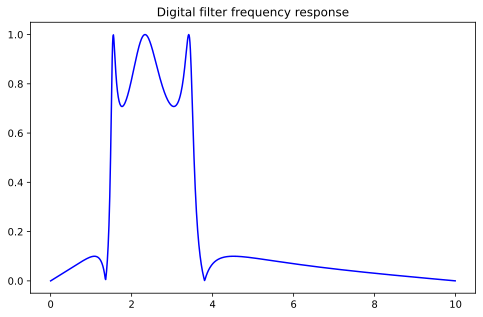

In [ ]:
wp = [1.5/(fs/2), 3.5/(fs/2)]
ws = [1/(fs/2), 4/(fs/2)]

N, Wn = signal.ellipord(wp, ws, 3, 20, fs = fs)
b, a = signal.ellip(N, 3, 20, Wn, btype = 'bandpass')

f, H = signal.freqz(b,a, 1000, fs = fs)
fig, ax1 = plt.subplots(figsize = (8,5))
ax1.set_title('Digital filter frequency response')
ax1.plot(f, np.abs(H), 'b');

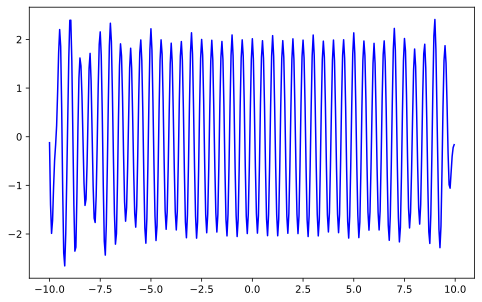

In [ ]:
x_filt = signal.filtfilt(b, a, x)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t,x_filt,'b')

<StemContainer object of 3 artists>

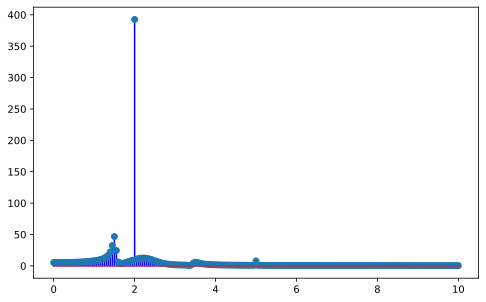

In [ ]:
# DFT of the filtered signal
n = len(x_filt)
f = np.fft.rfftfreq(n, 1/fs)
DFT = np.fft.rfft(x_filt)
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(f, np.abs(DFT.real), 'b')

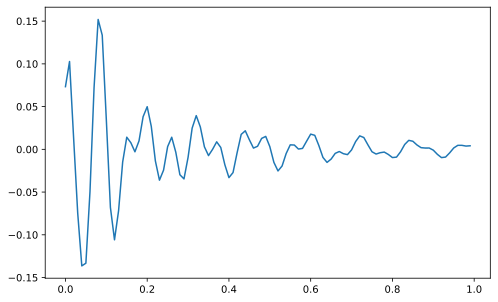

In [ ]:
# Plotting the filter in the time domain (IMPULSE RESPONSE OF THE FILTER (inverse DFT of the frequency response))

system = (b, a, 0.01)
t, h = signal.dimpulse(system)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t, np.squeeze(h))
# plt.ylim((-10,10))
# plt.xlim((0,50))


FIR FILTER

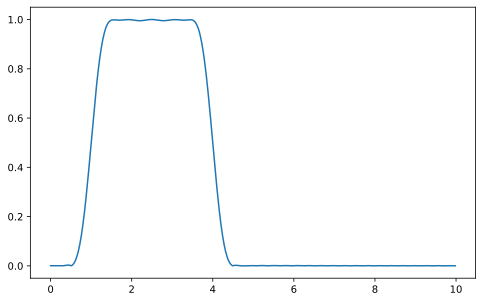

In [ ]:
f1, f2 = 30, 60
b = signal.firwin(70, [1, 4], pass_zero='bandpass', fs = fs)
f, H = signal.freqz(b, fs = fs)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(f, np.abs(H))

<StemContainer object of 3 artists>

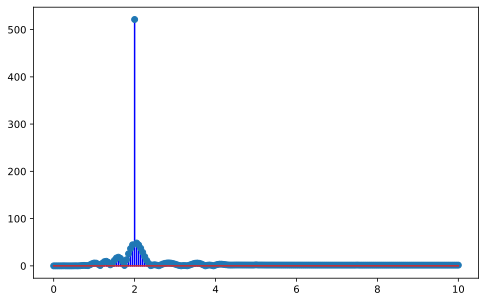

In [ ]:
x_filt = signal.lfilter(b, 1, x)
# DFT of the filtered signal
n = len(x_filt)
f = np.fft.rfftfreq(n, 1/fs)
DFT = np.fft.rfft(x_filt)
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(f, np.abs(DFT.real), 'b')

Impulse response of the FIR filter. Remember that an FIR filter only has the MA part --> The impulse response coincides with the coefficients of the filter!! h[n] == b. We can see from the plot that the coeff (== imp. resp.) are symmetric! --> This means (important theorem) that the filter has a linear phase, and hence we do not have any phase distortion (thanks to the function firwin)

Text(0.5, 1.0, 'FIR filter Impulse Response')

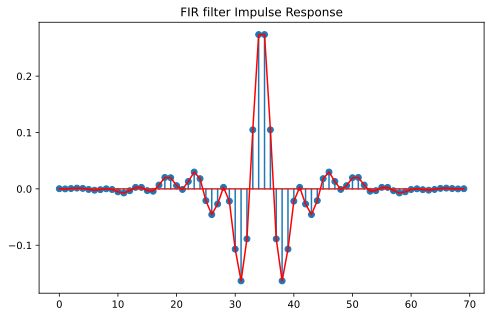

In [ ]:
l = np.arange(0,len(b))
fig, ax = plt.subplots(figsize = (8,5))
ax.stem(l,b)
ax.plot(l,b,'r')
ax.set_title('FIR filter Impulse Response')

What happens when we apply the FIR filter?

1.   Time domain: the output is the discrete convolution between the FIR filter coefficients b (imp. resp.) and the input signal
2.   Frequency domain: the output is the product between the FIR filter transfer function and the spectrum of the input signal



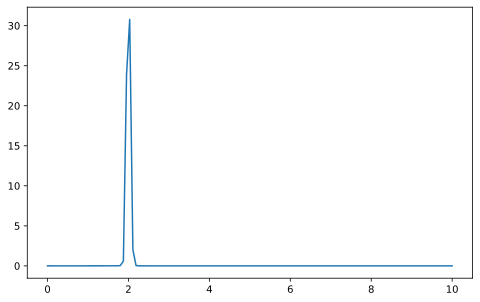

In [ ]:
# Power spectral density
f, pxx = signal.welch(x_filt, fs)
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(f, pxx)

Now let's filter some EEG data. The file EEG_eyes_open is imported from Matlab using the scipy.io function loadmat, which returns a dictionary with variable names as keys, and loaded matrices as values. That data is acquired on a single subject in resting state with his eyes open, at fs = 128 Hz. The data is already filtered between 0.5 - 40Hz and cleaned of blinking and ECG artifacts using ICA.

In [ ]:
from scipy.io import loadmat
%matplotlib widget
%config InlineBackend.figure_format = 'svg'

X_dict = loadmat('/content/EEG_eyes_open.mat')
print(X_dict)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Jan  3 17:53:57 2022', '__version__': '1.0', '__globals__': [], 'X_new': array([[  0.63289578,  -2.42002757,  -4.1693763 , ...,   1.47099093,
          0.69617312,  -0.13266446],
       [ -0.57067063,  -2.54108501,  -6.01857803, ...,   4.07604785,
          2.91066936,  -0.79799795],
       [  1.199131  ,  -0.86525437,  -1.77357726, ...,  -2.3095819 ,
         -1.95096062,  -1.73273381],
       ...,
       [  0.04325776,  -2.39680618,  -4.24403259, ...,  -1.21645013,
         -2.3165896 ,   0.64628635],
       [ -3.5244966 ,  -9.35305097,  -8.60932857, ...,  -6.5636509 ,
        -13.22595714, -10.86793759],
       [ -4.9183981 ,  -6.71536751,  -3.58959732, ..., -10.70391176,
        -10.31447693,  -1.63759878]])}


In [ ]:
# Loading the channels names
ch_dict = loadmat('/content/ch_names.mat')
ch_array = ch_dict['ch_names'].squeeze()
ch_names = []
for i in range(len(ch_array)):
  ch_names.append(ch_array[i][0])
print(ch_names)

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T7', 'C3', 'Cz', 'C4', 'T8', 'P7', 'P3', 'Pz', 'P4', 'P8', 'O1', 'O2']


In [ ]:
X = X_dict['X_new'] # Accessing the value (EEG_data) corresponding to key 'X_new'

In [ ]:
fs = 128 # Sampling frequency
n, m = X.shape # Channels, Time samples
X.shape

(19, 20480)

In [ ]:
X_samples = np.arange(0, m)
t = X_samples/fs
t[-1]

159.9921875

The duration of the recording is 160 seconds. I can now plot the channels both in time (15 seconds) and in frequency (whole duration).

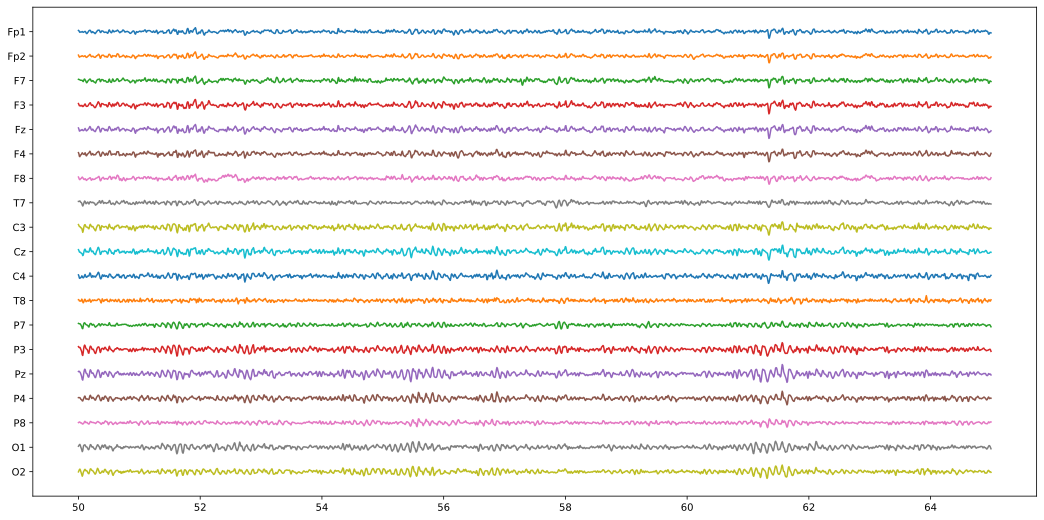

In [ ]:
# Time domain
fig, ax = plt.subplots(figsize = (18,9))
delta = 120
for i in range(n):
  ax.plot(t[50*fs:65*fs], X[i,50*fs:65*fs] - delta*i);
plt.ylim((-delta*n, delta));
ytic = np.arange(-delta*(n-1), 1, delta)
plt.yticks(ytic, ch_names[::-1]);

In [ ]:
# Frequency domain. The PSD is computed using the Welch method, using segments of 5s and a freq resolution of 0.1Hz
win = 5*fs
f, pxx = signal.welch(X, fs = 128, nperseg = win, nfft = 2*win)
pxx.shape

(19, 641)

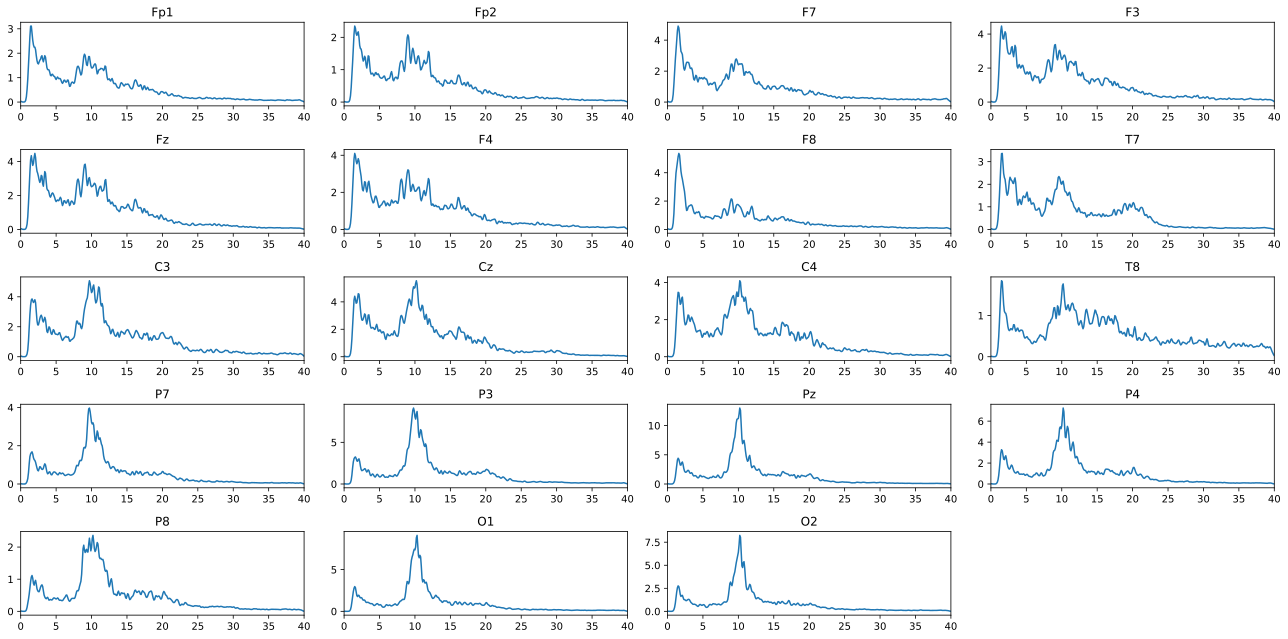

In [ ]:
plt.figure(figsize=(18,9))

# for each electrode
for i in range(n):
  # plot the PSD
  ax = plt.subplot(5, 4, i + 1)
  ax.title.set_text('{}' .format(ch_names[i]))
  ax.plot(f, pxx[i,:])
  plt.xlim((0,40))

plt.tight_layout()
plt.show()

We can clearly see that there is a strong alpha component in the posterior electrodes. I want now to isolate that rythm and plot it in the time domain (only for posterior electrodes). I use both an elliptic IIR filter with passband = [8-13] Hz and a 900th order FIR filter

In [ ]:
P7 = ch_names.index('P7')
O2 = ch_names.index('O2')
P7, O2

(12, 18)

In [ ]:
# posterior electrodes
X_post = X[P7:O2+1]
pxx_post = pxx[P7:O2+1]
n_post = X_post.shape[0]

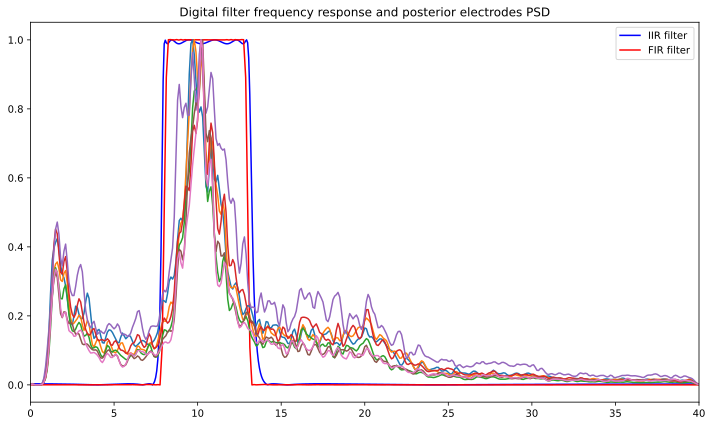

In [ ]:
# IIR elliptic filter
wp = [8/(fs/2), 13/(fs/2)]
ws = [6/(fs/2), 15/(fs/2)]

N, Wn = signal.ellipord(wp, ws, 0.1, 50, fs = fs)
b_IIR, a = signal.ellip(N, 0.1, 50, Wn, btype = 'bandpass')

F_IIR, H_IIR = signal.freqz(b_IIR,a, 1000, fs = fs)
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.set_title('Digital filter frequency response and posterior electrodes PSD')
ax1.plot(F_IIR, np.abs(H_IIR), 'b', label = 'IIR filter')

# FIR filter
f1, f2 = 8, 13
b_FIR = signal.firwin(900, [f1, f2], pass_zero='bandpass', fs = fs)
F_FIR, H_FIR = signal.freqz(b_FIR, fs = fs)
ax1.plot(F_FIR, np.abs(H_FIR), 'r', label = 'FIR filter')

# Plotting the normalized PSD (between 0 and 1)
for i in range(n_post):
  ax1.plot(f, (pxx_post[i, :] - min(pxx_post[i, :])) / (max(pxx_post[i, :]) - min(pxx_post[i, :])))
plt.xlim((0,40));
plt.legend()

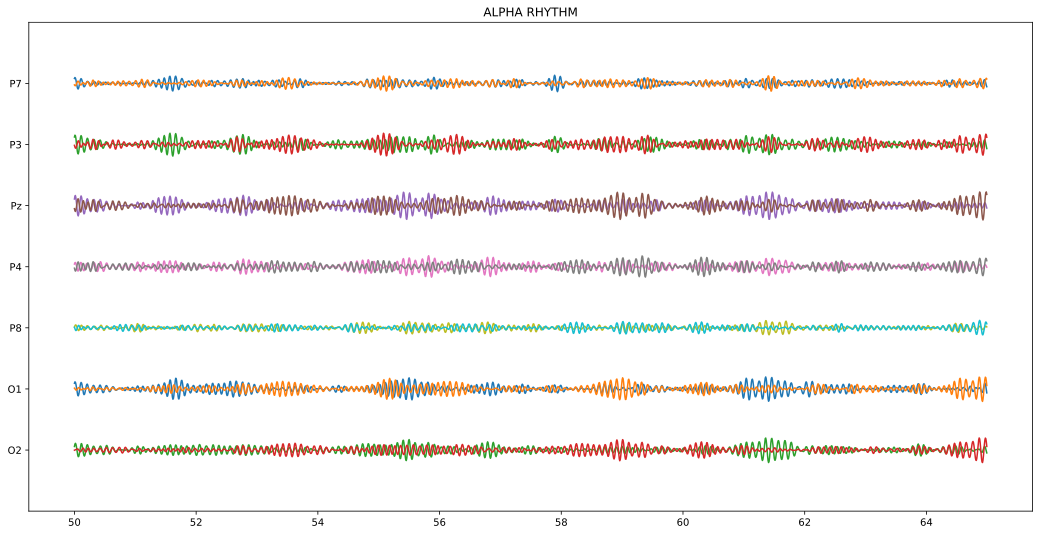

In [ ]:
# filtering
X_post_filt_IIR = signal.filtfilt(b_IIR, a, X_post, axis=-1) # IIR
X_post_filt_FIR = signal.lfilter(b_FIR, 1, X_post) # FIR

fig, ax = plt.subplots(figsize = (18,9))
delta = 120
for i in range(n_post):
  ax.plot(t[50*fs:65*fs], X_post_filt_IIR[i,50*fs:65*fs] - delta*i); # [50*fs:70*fs]
  ax.plot(t[50*fs:65*fs], X_post_filt_FIR[i,50*fs:65*fs] - delta*i);
plt.ylim((-delta*n_post, delta));
ytic = ytic = np.arange(-delta*(n_post-1), 1, delta)
plt.yticks(ytic, ch_names[O2:P7-1:-1]);
ax.set_title('ALPHA RHYTHM');

Well, why the two signals do not overlap? Because the FIR filter was applied using the function *lfilter*, which doesn't preserve the phase like *filtfilt*! BUT: the function *firwin* allows to design a FIR filter with linear phase (symmetric coefficients/impulse response) --> The filter introduces just a rigid time shift (to the right --> delay) of len(b)/2 !! --> I can easily rephase the signal by shifting it in time. This is done only for 'didactic' reasons, as the function *filtfilt* can be also used with FIR filters.

In [ ]:
sample_delay = 0.5*(len(b_FIR))
time_delay = 0.5*(len(b_FIR))/fs
time_delay # rigid delay (seconds) due to the FIR filter 

3.515625

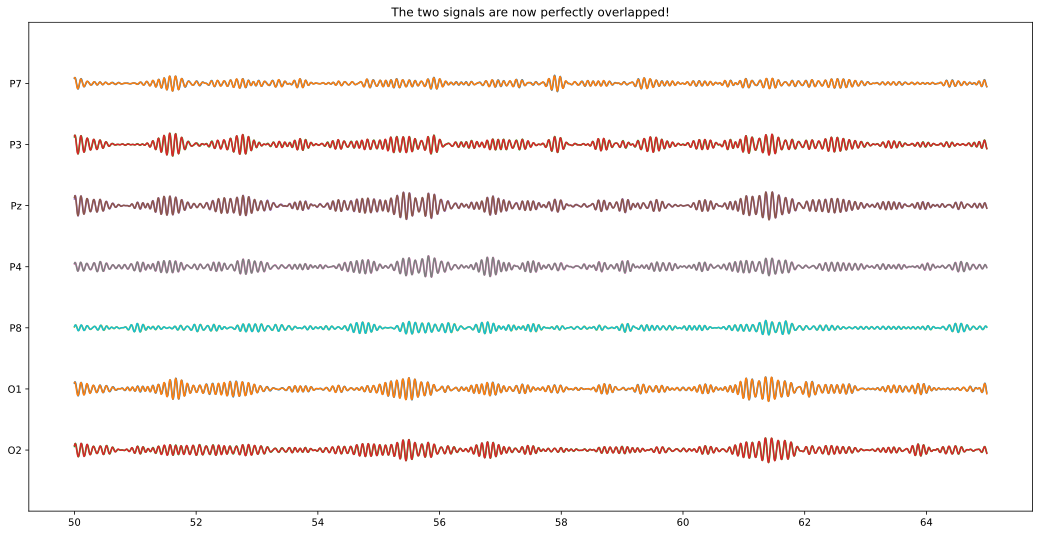

In [ ]:
X_shifted = np.zeros((n,m))
X_shifted = np.roll(X_post_filt_FIR, -int(sample_delay), axis = -1) # Shifting the signal by len(b)/2 samples to the left

fig, ax = plt.subplots(figsize = (18,9))
delta = 120
for i in range(n_post):
  ax.plot(t[50*fs:65*fs], X_post_filt_IIR[i,50*fs:65*fs] - delta*i); # [50*fs:70*fs]
  ax.plot(t[50*fs:65*fs], X_shifted[i,50*fs:65*fs] - delta*i);
plt.ylim((-delta*n_post, delta));
ytic = ytic = np.arange(-delta*(n_post-1), 1, delta)
plt.yticks(ytic, ch_names[O2:P7-1:-1]);
ax.set_title('The two signals are now perfectly overlapped!');

I want now to isolate the beta rhythm for the central electrodes (T7 - ... - T8) and plot it in the time domain. I use an elliptic IIR filter with passband = [8-13] Hz

In [ ]:
T7 = ch_names.index('T7')
T8 = ch_names.index('T8')
T7, T8

(7, 11)

In [ ]:
X_cent = X[T7:T8+1]
pxx_cent = pxx[T7:T8+1]
n_cent = X_cent.shape[0]

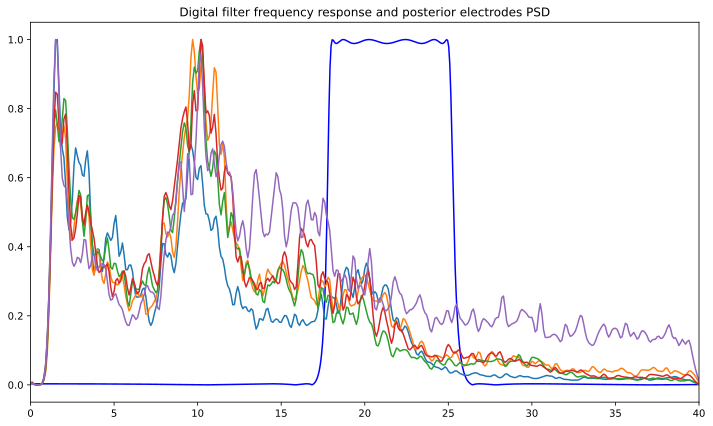

In [ ]:
# IIR elliptic filter
wp = [18/(fs/2), 25/(fs/2)]
ws = [16/(fs/2), 27/(fs/2)]

N, Wn = signal.ellipord(wp, ws, 0.1, 50, fs = fs)
b_beta, a_beta = signal.ellip(N, 0.1, 50, Wn, btype = 'bandpass')

F_IIR, H_IIR = signal.freqz(b_beta, a_beta, 1000, fs = fs)
fig, ax1 = plt.subplots(figsize = (12,7))
ax1.set_title('Digital filter frequency response and posterior electrodes PSD')
ax1.plot(F_IIR, np.abs(H_IIR), 'b', label = 'IIR filter')

# Plotting the normalized PSD (between 0 and 1)
for i in range(n_cent):
  ax1.plot(f, (pxx_cent[i, :] - min(pxx_cent[i, :])) / (max(pxx_cent[i, :]) - min(pxx_cent[i, :])))
plt.xlim((0,40));

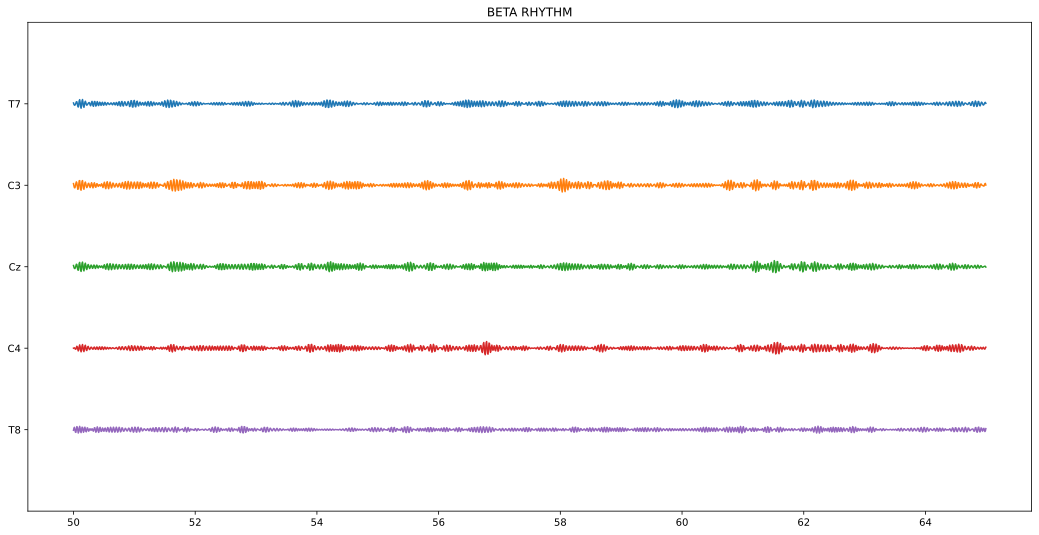

In [ ]:
# filtering
X_cent_filt_IIR = signal.filtfilt(b_beta, a_beta, X_cent, axis=-1) # IIR

fig, ax = plt.subplots(figsize = (18,9))
delta = 120
for i in range(n_cent):
  ax.plot(t[50*fs:65*fs], X_cent_filt_IIR[i,50*fs:65*fs] - delta*i); # [50*fs:70*fs]
plt.ylim((-delta*n_cent, delta));
ytic = ytic = np.arange(-delta*(n_cent-1), 1, delta)
plt.yticks(ytic, ch_names[T8:T7-1:-1]);
ax.set_title('BETA RHYTHM');

I now want to find the maximum peak to peak amplitude for both the alpha and the beta rhythm, and at which electrode it occurs.

In [ ]:
X_alpha = signal.filtfilt(b_IIR, a, X)
X_beta = signal.filtfilt(b_beta, a_beta, X)
max_alpha = np.max(np.abs(X_alpha), -1)*2
max_beta = np.max(np.abs(X_beta), -1)*2

In [ ]:
alpha = dict(zip(ch_names, max_alpha))
beta = dict(zip(ch_names, max_beta))
alpha = pd.DataFrame.from_dict(alpha, orient = 'index', columns = ['alpha max ampl'])
beta = pd.DataFrame.from_dict(beta, orient = 'index', columns = ['beta max ampl'])
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

display_side_by_side(alpha, beta)

,alpha max ampl
Fp1,31.936698
Fp2,27.777068
F7,38.467855
F3,48.949590
Fz,46.571426
F4,38.742007
F8,23.098603
T7,30.926789
C3,52.485349
Cz,56.813432
